In [11]:
import os
import pandas as pd
import requests

project_root = r"C:\Users\manna\trust-dynamics-motorsports"
output_dir = os.path.join(project_root, "data", "raw")
os.makedirs(output_dir, exist_ok=True)
file_path = os.path.join(output_dir, "lap_data_driver63_session9161.csv")

print("Saving to:", file_path)

url = "https://api.openf1.org/v1/laps?session_key=9161&driver_number=63"
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
df.to_csv(file_path, index=False)
print("File created:", os.path.isfile(file_path))


Saving to: C:\Users\manna\trust-dynamics-motorsports\data\raw\lap_data_driver63_session9161.csv
File created: True


In [12]:
import pandas as pd

df = pd.read_csv('data/raw/lap_data_driver63_session9161.csv')
print(df.head())


   meeting_key  session_key  driver_number  i1_speed  i2_speed  st_speed  \
0         1219         9161             63       246       254       NaN   
1         1219         9161             63       308       278     299.0   
2         1219         9161             63       210       241     238.0   
3         1219         9161             63       254       248       NaN   
4         1219         9161             63       309       277     299.0   

                         date_start  lap_duration  is_pit_out_lap  \
0  2023-09-16T13:03:31.040000+00:00           NaN            True   
1  2023-09-16T13:05:40.397000+00:00        92.478           False   
2  2023-09-16T13:07:12.989000+00:00       185.014           False   
3  2023-09-16T13:15:01.606000+00:00       428.170            True   
4  2023-09-16T13:17:26.025000+00:00        92.331           False   

   duration_sector_1  duration_sector_2  duration_sector_3  \
0                NaN             51.687             37.673   
1   

In [13]:
import pandas as pd

df = pd.read_csv('data/raw/lap_data_driver63_session9161.csv')
print("Columns in the dataset:", df.columns.tolist())


Columns in the dataset: ['meeting_key', 'session_key', 'driver_number', 'i1_speed', 'i2_speed', 'st_speed', 'date_start', 'lap_duration', 'is_pit_out_lap', 'duration_sector_1', 'duration_sector_2', 'duration_sector_3', 'segments_sector_1', 'segments_sector_2', 'segments_sector_3', 'lap_number']


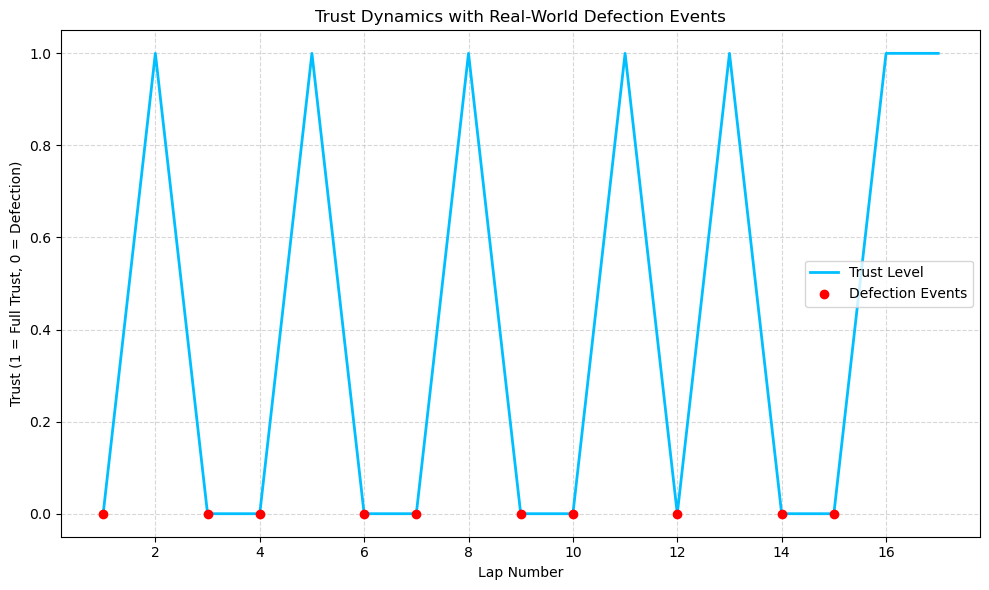

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
csv_path = r"C:\Users\manna\trust-dynamics-motorsports\data\raw\lap_data_driver63_session9161.csv"
if not os.path.isfile(csv_path):
    raise FileNotFoundError(f"File not found: {csv_path}")


df = pd.read_csv(csv_path)


df['lap_duration'] = pd.to_numeric(df['lap_duration'], errors='coerce')


df['lap_time_diff'] = df['lap_duration'].diff()

df['defection_event'] = (df['lap_time_diff'] > 2.0) | (df['is_pit_out_lap'] == True)

df['trust_level'] = (~df['defection_event']).astype(int)

# Plot
plt.figure(figsize=(10,6))
plt.plot(df['lap_number'], df['trust_level'], color='deepskyblue', label='Trust Level', linewidth=2)
plt.scatter(df[df['defection_event']]['lap_number'], [0]*df['defection_event'].sum(), color='red', label='Defection Events', zorder=5)
plt.xlabel("Lap Number")
plt.ylabel("Trust (1 = Full Trust, 0 = Defection)")
plt.title("Trust Dynamics with Real-World Defection Events")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
